In [4]:
import os, boto3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import scienceplots

# todo fix

In [5]:
folder = "elbenalp"
webcams = ['romanshorn', 'rorschacherberg', 'altenrhein', 'ebenalp', 'kronberg', 'wiler-turm', 'golfclub-erlen', 'sitterdorf']

In [7]:
df = pd.DataFrame()
for wbc in webcams:
    img_files = os.listdir(f"../../data/{wbc}")
    img_ts = [dt.datetime.strptime(img.split(".")[0], "%Y-%m-%d_%H-%M-%S") for img in img_files]
    img_files = pd.DataFrame({"filename": img_files, "timestamp": img_ts, "webcam": wbc})
    img_files.sort_values("timestamp", inplace=True)
    img_files.reset_index(drop=True, inplace=True)
    df = pd.concat([df, img_files])

In [8]:
df

,filename,timestamp,webcam
0,2024-08-28_05-00-00.jpg,2024-08-28 05:00:00,romanshorn
1,2024-08-28_05-20-00.jpg,2024-08-28 05:20:00,romanshorn
2,2024-08-28_05-40-00.jpg,2024-08-28 05:40:00,romanshorn
3,2024-08-28_06-00-00.jpg,2024-08-28 06:00:00,romanshorn
4,2024-08-28_06-20-00.jpg,2024-08-28 06:20:00,romanshorn
...,...,...,...
16451,2025-03-14_13-50-00.jpg,2025-03-14 13:50:00,sitterdorf
16452,2025-03-14_14-00-00.jpg,2025-03-14 14:00:00,sitterdorf
16453,2025-03-14_14-10-00.jpg,2025-03-14 14:10:00,sitterdorf
16454,2025-03-14_14-20-00.jpg,2025-03-14 14:20:00,sitterdorf


In [9]:
df_timesteps = df.copy()
df_timesteps["ymd"] = df_timesteps["timestamp"].dt.to_period('D')
counts_per_cam_day = df_timesteps.groupby("ymd").count()
counts_per_cam_day = counts_per_cam_day.reset_index()
img_count_df = counts_per_cam_day.rename(columns={"timestamp": "img_count"})
img_count_df

,ymd,filename,img_count,webcam
0,2024-02-12,56,56,56
1,2024-02-13,61,61,61
2,2024-02-14,60,60,60
3,2024-02-15,62,62,62
4,2024-02-16,60,60,60
...,...,...,...,...
383,2025-03-10,654,654,654
384,2025-03-11,659,659,659
385,2025-03-12,646,646,646
386,2025-03-13,642,642,642


In [10]:
img_count_df['datetime'] = img_count_df['ymd'].apply(lambda x: x.to_timestamp())
img_count_df['year'] = img_count_df.datetime.dt.year
img_count_df['month'] = img_count_df.datetime.dt.month
img_count_df['weekday'] = img_count_df.datetime.dt.day_name()
img_count_df['calendar week'] = img_count_df.datetime.dt.isocalendar().week
img_count_df['iso_year'] = img_count_df['datetime'].dt.isocalendar().year

In [11]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_names = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 
               7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}

In [12]:
# Ensure correct sorting
img_count_df = img_count_df.sort_values(by='datetime')

pivoted_data = pd.pivot_table(
    img_count_df[['iso_year', 'calendar week', 'weekday', 'img_count']],
    values='img_count',
    index='weekday',
    columns=['iso_year', 'calendar week'],
    aggfunc="mean"
)
pivoted_data = pivoted_data.reindex(weekday_order)
pivoted_data

iso_year       2024                                                        \
calendar week    7     8     9     10    11    12    13    14    16    17   
weekday                                                                     
Monday         56.0  58.0  63.0  64.0  69.0  67.0  70.0  71.0  14.0  78.0   
Tuesday        61.0  61.0  61.0  61.0  66.0  70.0  71.0  76.0  76.0  75.0   
Wednesday      60.0  62.0  58.0  62.0  65.0  70.0  67.0  75.0  79.0  84.0   
Thursday       62.0  56.0  63.0  66.0  71.0  68.0  70.0  75.0  80.0  83.0   
Friday         60.0  60.0  59.0  66.0  69.0  70.0  71.0  22.0  79.0  84.0   
Saturday       54.0  64.0  64.0  67.0  70.0  70.0  71.0   NaN  80.0  86.0   
Sunday         61.0  64.0  66.0  63.0  69.0  68.0  73.0   NaN  81.0  83.0   

iso_year       ...   2025                                                   \
calendar week  ...     2      3      4      5      6      7      8      9    
weekday        ...                                                           
Monday         ...  578.0  591.0  583.0  566.0  599.0  528.0  622.0  632.0   
Tuesday        ...  572.0  589.0  582.0  557.0  607.0  551.0  626.0  635.0   
Wednesday      ...  571.0  579.0  585.0  601.0  537.0  609.0  548.0  630.0   
Thursday       ...  582.0  587.0  575.0  544.0  482.0  607.0  553.0  641.0   
Friday         ...  587.0  571.0  598.0  548.0  539.0  554.0  553.0  621.0   
Saturday       ...  587.0  586.0  598.0  588.0  542.0  627.0  541.0  603.0   
Sunday         ...  584.0  575.0  592.0  592.0  534.0  624.0  593.0  649.0   

iso_year                     
calendar week     10     11  
weekday                      
Monday         639.0  654.0  
Tuesday        638.0  659.0  
Wednesday      628.0  646.0  
Thursday       642.0  642.0  
Friday         631.0  347.0  
Saturday       645.0    NaN  
Sunday         662.0    NaN  

[7 rows x 56 columns]

In [13]:
xtick_labels = []
labeled_periods = set()

for (iso_year, week) in pivoted_data.columns:
    week_data = img_count_df[(img_count_df['iso_year'] == iso_year) & (img_count_df['calendar week'] == week)]
    
    if not week_data.empty:
        first_date_of_week = week_data['datetime'].min()
        calendar_year = first_date_of_week.year
        month = first_date_of_week.month

        # Check if ISO year differs from calendar year
        if iso_year != calendar_year:
            month = 1  # Assign January if it's part of the new ISO year

        label_key = (iso_year, month)
        
        if label_key not in labeled_periods:
            xtick_labels.append(f"{month_names[month]} {iso_year} - W{week}")
            labeled_periods.add(label_key)
        else:
            xtick_labels.append(f"W{week}")
    else:
        xtick_labels.append(f"W{week}")


In [14]:
# TODO color treshold for b/w print (img count in square)

<Figure size 640x480 with 0 Axes>

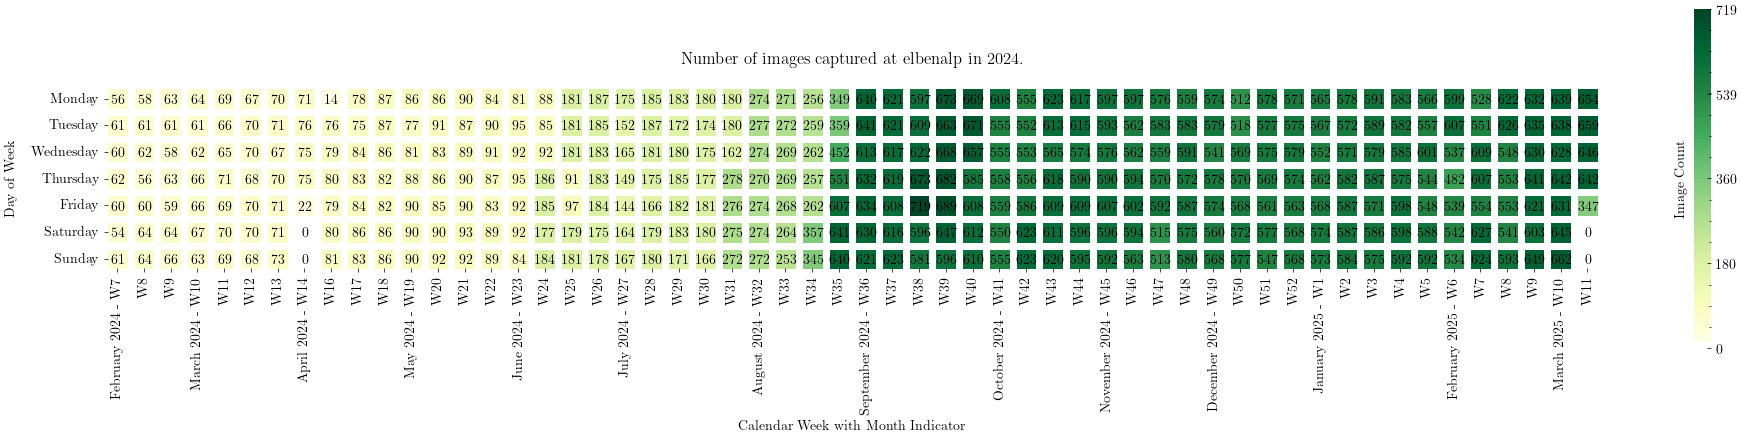

In [15]:
# clear previous plot
plt.clf()

# Plot heatmap
with plt.style.context(['science']):
    plt.figure(figsize=(20, 10))
    heatmap = sns.heatmap(pivoted_data, linewidths=5, cmap='YlGn', linecolor='white',
                          square=True, cbar_kws={"label": "Image Count", "pad": 0.05, "shrink": 0.35})

    # Customize colorbar
    cbar = heatmap.collections[0].colorbar
    cbar.set_label('Image Count', labelpad=10)  # Adjust rotation and padding
    cbar.ax.yaxis.set_label_position('left')  # Position the label on the left sideö
    cbar.ax.yaxis.label.set_verticalalignment('center')
    ticks = np.linspace(0, np.max(pivoted_data), num=5)  # Create an array of intermediate values
    ticks = np.round(ticks).astype(int)
    cbar.set_ticks(ticks)

    # Add text to heatmap cells
    for i in range(pivoted_data.shape[0]):  # Loop over rows
        for j in range(pivoted_data.shape[1]):  # Loop over columns
            count = pivoted_data.values[i, j]  # Get the associated count
            heatmap.text(j + 0.53, i + 0.53, f'{0 if np.isnan(count) else int(count)}', ha='center', va='center', color='black')
    
    # Customize x-ticks
    plt.xticks(ticks=np.arange(len(pivoted_data.columns)) + 0.5, labels=xtick_labels, rotation=90, ha='center')
    plt.minorticks_off()
    #  only turn off top x-major-ticks
    plt.tick_params(axis='x', which='both', top=False)
    plt.tick_params(axis='y', which='both', right=False, rotation=0)
    plt.ylabel('Day of Week', labelpad=10)
    plt.xlabel('Calendar Week with Month Indicator')
    plt.title(f'Number of images captured at {folder} in 2024.', pad=15)
    plt.tight_layout()
    plt.show()
    # plt.savefig("../viz/heatmap.png", dpi=300)